In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt

from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras import backend as K
import tensorflow as tf

%matplotlib inline

In [2]:
path="Data/UCI HAR Dataset/"
features = list()
with open(path+"Features.txt") as f:
    for line in f:
        features.append(line.split()[1])
print(len(features))

561


In [16]:
train_df = pd.read_csv(path+"train/X_train.txt", delim_whitespace = True)
train_df.columns = features

#y_train = pd.read_csv(path+"train/X_train.txt", delim_whitespace = True)
#y_train.columns = features
y_train = pd.read_csv(path+"train/y_train.txt", header = None, squeeze = True)

test_df = pd.read_csv(path+"test/X_test.txt", delim_whitespace = True)

train_df.shape

(7351, 561)

In [12]:
train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
2,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
3,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
4,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,0.019953,-0.545410,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126


In [13]:
y_train.head()

0    5
1    5
2    5
3    5
4    5
Name: 0, dtype: int64

In [4]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
scaler.fit(train_df)
train_df_transformed=scaler.transform(train_df)

In [32]:
input_shape = train_df.shape[1]
inputs = Input(shape=(input_shape))

#Encoder
encoded = Dense(128, activation='linear')(inputs)
encoded = Dense(64, activation='linear')(encoded)

#Decoder
decoded = Dense(128, activation='linear')(encoded)
decoded = Dense(input_shape, activation='linear')(decoded)

#Model setup, summary and compilation
deep_autoencoder = Model(inputs, decoded)
deep_autoencoder.summary()
deep_autoencoder.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.01), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['sparse_categorical_accuracy'])

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 561)]             0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               71936     
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_18 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_19 (Dense)             (None, 561)               72369     
Total params: 160,881
Trainable params: 160,881
Non-trainable params: 0
_________________________________________________________________


In [6]:
#train_y = tf.convert_to_tensor(y_train)

In [33]:
batch_size = 128

history = deep_autoencoder.fit(
    train_df,
    train_y,
    epochs=250,
    batch_size=batch_size,
    validation_split=0.2
)

Epoch 1/250
46/46 [==============================] - 0s 8ms/step - loss: 6.3662 - sparse_categorical_accuracy: 3.4014e-04 - val_loss: 5.9211 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/250
46/46 [==============================] - 0s 6ms/step - loss: 5.5491 - sparse_categorical_accuracy: 0.1257 - val_loss: 4.9903 - val_sparse_categorical_accuracy: 0.2672
Epoch 3/250
46/46 [==============================] - 0s 5ms/step - loss: 4.4633 - sparse_categorical_accuracy: 0.2425 - val_loss: 3.6745 - val_sparse_categorical_accuracy: 0.2332
Epoch 4/250
46/46 [==============================] - 0s 5ms/step - loss: 3.0273 - sparse_categorical_accuracy: 0.2990 - val_loss: 2.1972 - val_sparse_categorical_accuracy: 0.4086
Epoch 5/250
46/46 [==============================] - 0s 5ms/step - loss: 1.8949 - sparse_categorical_accuracy: 0.5483 - val_loss: 1.5233 - val_sparse_categorical_accuracy: 0.6077
Epoch 6/250
46/46 [==============================] - 0s 5ms/step - loss: 1.4721 - sparse_categori

46/46 [==============================] - 0s 5ms/step - loss: 0.4659 - sparse_categorical_accuracy: 0.8597 - val_loss: 0.4419 - val_sparse_categorical_accuracy: 0.8865
Epoch 47/250
46/46 [==============================] - 0s 5ms/step - loss: 0.4609 - sparse_categorical_accuracy: 0.8614 - val_loss: 0.4366 - val_sparse_categorical_accuracy: 0.8878
Epoch 48/250
46/46 [==============================] - 0s 5ms/step - loss: 0.4562 - sparse_categorical_accuracy: 0.8631 - val_loss: 0.4326 - val_sparse_categorical_accuracy: 0.8892
Epoch 49/250
46/46 [==============================] - 0s 5ms/step - loss: 0.4518 - sparse_categorical_accuracy: 0.8628 - val_loss: 0.4288 - val_sparse_categorical_accuracy: 0.8892
Epoch 50/250
46/46 [==============================] - 0s 5ms/step - loss: 0.4476 - sparse_categorical_accuracy: 0.8633 - val_loss: 0.4224 - val_sparse_categorical_accuracy: 0.8919
Epoch 51/250
46/46 [==============================] - 0s 5ms/step - loss: 0.4432 - sparse_categorical_accuracy: 0

46/46 [==============================] - 0s 6ms/step - loss: 0.3400 - sparse_categorical_accuracy: 0.9000 - val_loss: 0.3260 - val_sparse_categorical_accuracy: 0.9069
Epoch 92/250
46/46 [==============================] - 0s 5ms/step - loss: 0.3382 - sparse_categorical_accuracy: 0.8985 - val_loss: 0.3254 - val_sparse_categorical_accuracy: 0.9062
Epoch 93/250
46/46 [==============================] - 0s 5ms/step - loss: 0.3366 - sparse_categorical_accuracy: 0.9002 - val_loss: 0.3238 - val_sparse_categorical_accuracy: 0.9062
Epoch 94/250
46/46 [==============================] - 0s 5ms/step - loss: 0.3351 - sparse_categorical_accuracy: 0.9009 - val_loss: 0.3250 - val_sparse_categorical_accuracy: 0.9055
Epoch 95/250
46/46 [==============================] - 0s 5ms/step - loss: 0.3334 - sparse_categorical_accuracy: 0.9020 - val_loss: 0.3234 - val_sparse_categorical_accuracy: 0.9055
Epoch 96/250
46/46 [==============================] - 0s 5ms/step - loss: 0.3317 - sparse_categorical_accuracy: 0

46/46 [==============================] - 0s 5ms/step - loss: 0.2812 - sparse_categorical_accuracy: 0.9201 - val_loss: 0.2899 - val_sparse_categorical_accuracy: 0.9089
Epoch 137/250
46/46 [==============================] - 0s 5ms/step - loss: 0.2801 - sparse_categorical_accuracy: 0.9213 - val_loss: 0.2861 - val_sparse_categorical_accuracy: 0.9075
Epoch 138/250
46/46 [==============================] - 0s 5ms/step - loss: 0.2787 - sparse_categorical_accuracy: 0.9219 - val_loss: 0.2871 - val_sparse_categorical_accuracy: 0.9062
Epoch 139/250
46/46 [==============================] - 0s 5ms/step - loss: 0.2781 - sparse_categorical_accuracy: 0.9218 - val_loss: 0.2857 - val_sparse_categorical_accuracy: 0.9069
Epoch 140/250
46/46 [==============================] - 0s 5ms/step - loss: 0.2769 - sparse_categorical_accuracy: 0.9214 - val_loss: 0.2852 - val_sparse_categorical_accuracy: 0.9055
Epoch 141/250
46/46 [==============================] - 0s 5ms/step - loss: 0.2760 - sparse_categorical_accura

46/46 [==============================] - 0s 5ms/step - loss: 0.2452 - sparse_categorical_accuracy: 0.9306 - val_loss: 0.2703 - val_sparse_categorical_accuracy: 0.9069
Epoch 182/250
46/46 [==============================] - 0s 6ms/step - loss: 0.2449 - sparse_categorical_accuracy: 0.9320 - val_loss: 0.2703 - val_sparse_categorical_accuracy: 0.9062
Epoch 183/250
46/46 [==============================] - 0s 6ms/step - loss: 0.2441 - sparse_categorical_accuracy: 0.9310 - val_loss: 0.2698 - val_sparse_categorical_accuracy: 0.9075
Epoch 184/250
46/46 [==============================] - 0s 5ms/step - loss: 0.2435 - sparse_categorical_accuracy: 0.9323 - val_loss: 0.2706 - val_sparse_categorical_accuracy: 0.9055
Epoch 185/250
46/46 [==============================] - 0s 5ms/step - loss: 0.2431 - sparse_categorical_accuracy: 0.9323 - val_loss: 0.2696 - val_sparse_categorical_accuracy: 0.9075
Epoch 186/250
46/46 [==============================] - 0s 5ms/step - loss: 0.2427 - sparse_categorical_accura

46/46 [==============================] - 0s 5ms/step - loss: 0.2221 - sparse_categorical_accuracy: 0.9378 - val_loss: 0.2642 - val_sparse_categorical_accuracy: 0.9069
Epoch 227/250
46/46 [==============================] - 0s 5ms/step - loss: 0.2217 - sparse_categorical_accuracy: 0.9366 - val_loss: 0.2641 - val_sparse_categorical_accuracy: 0.9082
Epoch 228/250
46/46 [==============================] - 0s 5ms/step - loss: 0.2210 - sparse_categorical_accuracy: 0.9383 - val_loss: 0.2681 - val_sparse_categorical_accuracy: 0.9137
Epoch 229/250
46/46 [==============================] - 0s 5ms/step - loss: 0.2210 - sparse_categorical_accuracy: 0.9364 - val_loss: 0.2619 - val_sparse_categorical_accuracy: 0.9096
Epoch 230/250
46/46 [==============================] - 0s 5ms/step - loss: 0.2206 - sparse_categorical_accuracy: 0.9372 - val_loss: 0.2640 - val_sparse_categorical_accuracy: 0.9123
Epoch 231/250
46/46 [==============================] - 0s 5ms/step - loss: 0.2201 - sparse_categorical_accura

Text(0.5, 1.0, 'Test Loss')

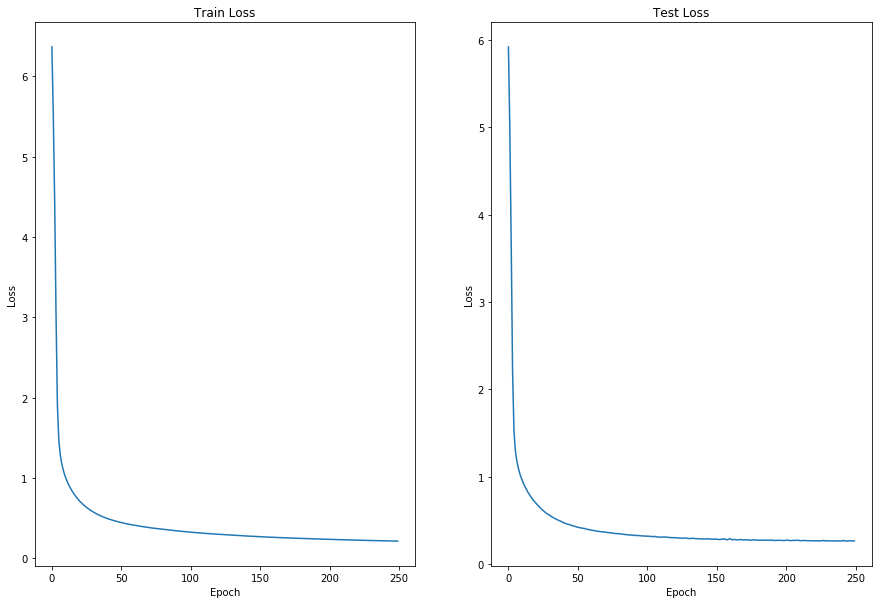

In [39]:
plt.figure(figsize=(15,10))
ax = plt.subplot(1, 2, 1)
plt.plot(history.history["loss"])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title("Train Loss")
ax = plt.subplot(1, 2, 2)
plt.plot(history.history["val_loss"])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title("Test Loss")

Text(0.5, 1.0, 'Test Loss')

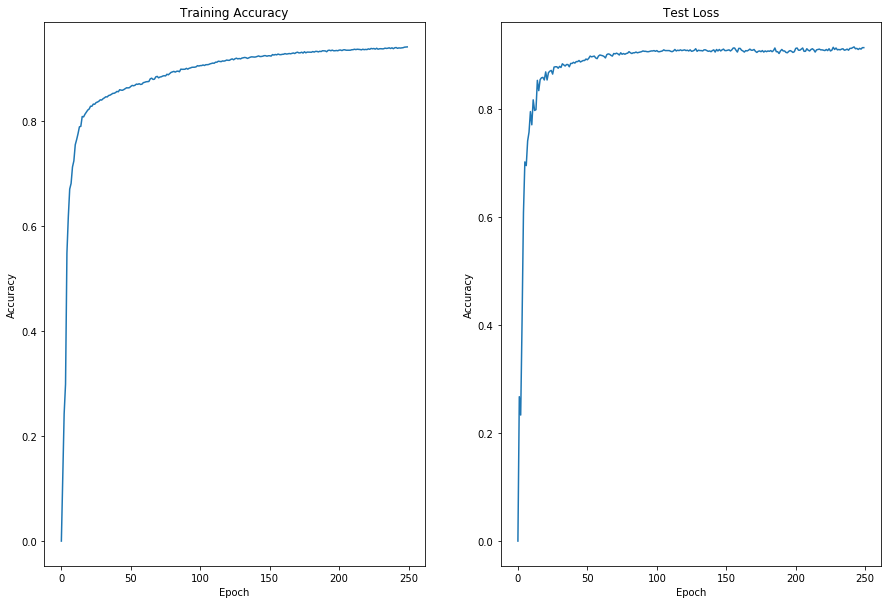

In [40]:
plt.figure(figsize=(15,10))
ax = plt.subplot(1, 2, 1)
plt.plot(history.history["sparse_categorical_accuracy"])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title("Training Accuracy")
ax = plt.subplot(1, 2, 2)
plt.plot(history.history["val_sparse_categorical_accuracy"])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title("Test Loss")

In [44]:
# use our encoded layer to encode the training input
encoder = Model(inputs, encoded)
encoded_input = Input(shape=(128,))
decoder_layer = pca_autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
encoded_data = encoder.predict(train_df_transformed)

In [45]:
columns=[]
for i in range(0,64):
#     name=
#     print(name)
    columns.append("AE "+str(i))
principalDf = pd.DataFrame(data = encoded_data
             , columns = columns)
principalDf.head(5)

,AE 0,AE 1,AE 2,AE 3,AE 4,AE 5,AE 6,AE 7,AE 8,AE 9,...,AE 54,AE 55,AE 56,AE 57,AE 58,AE 59,AE 60,AE 61,AE 62,AE 63
0,0.061641,-0.150934,0.190499,0.429896,-0.173330,-0.081479,-0.253988,0.392437,-0.010271,0.005563,...,0.390253,0.516544,0.203734,-0.119307,0.344501,0.073933,0.409068,0.130457,0.375361,-0.086755
1,0.063400,-0.152217,0.207805,0.408804,-0.189895,-0.101172,-0.252853,0.388733,0.000417,-0.008682,...,0.377874,0.538338,0.214086,-0.106509,0.380386,0.070518,0.395670,0.124871,0.400270,-0.084707
2,0.015994,-0.131714,0.185455,0.410692,-0.182738,-0.106351,-0.248084,0.391314,-0.053427,0.002418,...,0.366021,0.502293,0.205302,-0.135642,0.332580,0.074409,0.385943,0.128401,0.381829,-0.072658
3,0.035494,-0.121789,0.192714,0.397515,-0.185713,-0.107767,-0.264636,0.394023,-0.027851,-0.002690,...,0.345555,0.527173,0.179795,-0.119835,0.357520,0.070848,0.385343,0.136985,0.393604,-0.084635
4,0.041311,-0.133315,0.185399,0.378984,-0.177408,-0.105027,-0.268607,0.384995,-0.019349,-0.002104,...,0.319582,0.530311,0.176218,-0.113483,0.353262,0.054021,0.379648,0.131356,0.394925,-0.084866


In [46]:
train_df_activities = pd.read_csv(path+"train/X_train.txt", delim_whitespace = True)
train_df_activities.columns = features

train_df_activities["subject_id"] = pd.read_csv(path+"train/subject_train.txt", header = None, squeeze = True) #squeeze = True will 
# #return data in pandas series format

train_df_activities["activity"] = pd.read_csv(path+"train/y_train.txt", header = None, squeeze = True)

activity = pd.read_csv(path+"train/y_train.txt", header = None, squeeze = True)

#mapping activity to activity name
label_name = activity.map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"})

train_df_activities["activity_name"] = label_name

In [49]:
principalDf["activity_name"]=train_df_activities.loc[:,["activity_name"]]

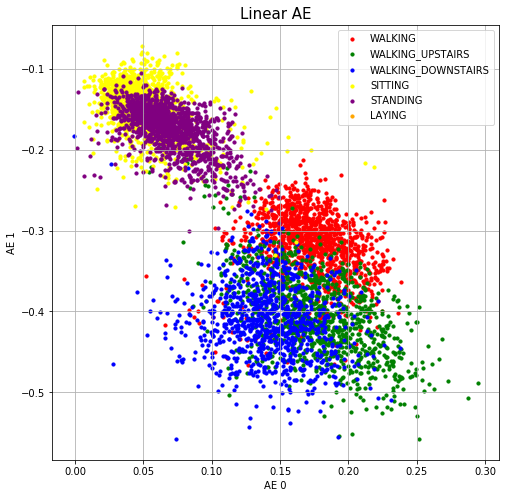

In [50]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('AE 0', fontsize = 10)
ax.set_ylabel('AE 1', fontsize = 10)
ax.set_title('Linear AE', fontsize = 15)


targets = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS',"SITTING","STANDING","LAYING"]
colors = ['r', 'g', 'b', 'yellow', 'purple','orange']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['activity_name'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'AE 0']
               , principalDf.loc[indicesToKeep, 'AE 1']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()